Pree T.
Demonstrate model tuning using k-fold cross-validation with python

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import statistics
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df[['sepal_length', 'sepal_width', 
                                                        'petal_length', 'petal_width']],
                                                    df['species'], random_state = 0, train_size = 0.8, test_size = 0.2)

In [4]:
# see the shape of train and test sets
print("x_train shape: {}\ny_train shape: {}".format(x_train.shape, y_train.shape))
print("x_test shape: {}\ny_test shape: {}".format(x_test.shape, y_test.shape))

x_train shape: (120, 4)
y_train shape: (120,)
x_test shape: (30, 4)
y_test shape: (30,)


In [5]:
# initialize the knn architecture, manually pick the k value (worst one)
knn = KNeighborsClassifier(n_neighbors=50, metric = 'euclidean')

In [6]:
# fit the model to training set and predict classes
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy rate: ', metrics.accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy rate:  0.8666666666666667
Confusion matrix:
[[11  0  0]
 [ 0 11  2]
 [ 0  2  4]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       0.85      0.85      0.85        13
  virginica       0.67      0.67      0.67         6

avg / total       0.87      0.87      0.87        30



Not very good results, so we are preform model regularization and model assesement using k-fold, k = 10

In [7]:
# Experimenting with different k values
k_range = list(range(1,50))
scores_cv = []
scores_train = []
scores_test = []
models = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    scores_cv.append(statistics.mean(scores))
    knn.fit(x_train, y_train)
    
    y_pred_train = knn.predict(x_train)
    scores_train.append( metrics.accuracy_score(y_train, y_pred_train) )
    y_pred_test = knn.predict(x_test)
    scores_test.append( metrics.accuracy_score(y_test, y_pred_test) )
    models.append(knn)
    


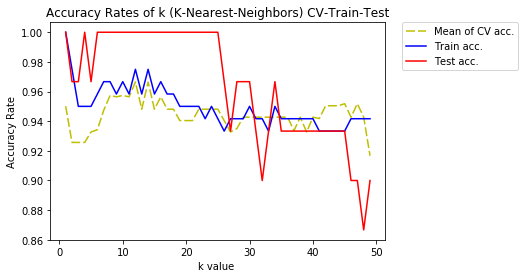

<Figure size 432x288 with 0 Axes>

In [8]:
# comparing CV scores, train and test scores

plt.plot(k_range, scores_cv, 'y', dashes=[6, 2], label = "Mean of CV acc.")
plt.plot(k_range, scores_train, 'b', label = "Train acc.")
plt.plot(k_range, scores_test, 'r', label= "Test acc.")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('k value ')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates of k (K-Nearest-Neighbors) CV-Train-Test')
plt.show()
plt.savefig('KNN_CV_Train_Test' + '.png', dpi=900)

In [9]:
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))

optimal_model = models[index]
print(optimal_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')


Now we have the optimal model, we are going to test with the unseen test data

In [10]:
optimal_model.fit(x_train, y_train)
y_pred = optimal_model.predict(x_test)
print('Test Accuracy rate: ', metrics.accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Test Accuracy rate:  1.0
Confusion matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       1.00      1.00      1.00        13
  virginica       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30

